## **1- Exploratory data analysis (EDA)**

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
url_data = 'https://github.com/IgorNascAlves/data_flight_delays/blob/main/data/flights_with_noise.csv?raw=True'
SEED = 42

In [138]:
df = pd.read_csv(url_data)

In [139]:
df = df.sample(n=10000, random_state=SEED)

In [140]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
40337,18,FV,Boeing 737,schengen,ZME,10.566427,13.566427,134,2017,False,16.839610
9354,20,FV,Boeing 737,non-schengen,KXL,8.775956,11.775956,258,2011,False,32.898689
64321,11,FV,Airbus A320,schengen,CBT,17.570400,20.570400,273,2021,False,44.002859
24993,26,FV,Airbus A320,schengen,ZME,5.894353,8.894353,206,2014,False,-7.039840
10688,8,FV,Airbus A320,schengen,CBT,16.407612,20.407612,347,2011,False,-3.453286


In [141]:
df.shape

(10000, 11)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 40337 to 44260
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       10000 non-null  int64  
 1   airline         10000 non-null  object 
 2   aircraft_type   10000 non-null  object 
 3   schengen        10000 non-null  object 
 4   origin          10000 non-null  object 
 5   arrival_time    10000 non-null  float64
 6   departure_time  10000 non-null  float64
 7   day             10000 non-null  int64  
 8   year            10000 non-null  int64  
 9   is_holiday      10000 non-null  bool   
 10  delay           10000 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 869.1+ KB


In [143]:
df.nunique()

flight_id            30
airline               3
aircraft_type         4
schengen              2
origin                7
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             10000
dtype: int64

In [144]:
df['schengen'].unique()

array(['schengen', 'non-schengen'], dtype=object)

In [145]:
df['is_holiday'].unique()

array([False,  True])

## **2 - Data preprocessing**

In [146]:
df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
40337,18,FV,Boeing 737,schengen,ZME,10.566427,13.566427,134,2017,False,16.839610
9354,20,FV,Boeing 737,non-schengen,KXL,8.775956,11.775956,258,2011,False,32.898689
64321,11,FV,Airbus A320,schengen,CBT,17.570400,20.570400,273,2021,False,44.002859
24993,26,FV,Airbus A320,schengen,ZME,5.894353,8.894353,206,2014,False,-7.039840
10688,8,FV,Airbus A320,schengen,CBT,16.407612,20.407612,347,2011,False,-3.453286
...,...,...,...,...,...,...,...,...,...,...,...
40080,8,FV,Airbus A320,schengen,CBT,16.407612,20.407612,117,2017,False,57.670276
40123,24,YB,Airbus A320,schengen,WMW,18.004118,20.004118,119,2017,False,90.722573
45488,21,FV,Airbus A320,non-schengen,ZME,8.152417,12.152417,112,2018,False,14.700350
30240,25,FV,Boeing 787,schengen,CBT,11.605422,16.605422,191,2015,False,115.685167


In [147]:
# Transforming the values of the "schengen" and "is_holiday" columns.
df['is_holiday'] = df['is_holiday'].map({False: 0, True: 1})
df['schengen'] = df['schengen'].map({'non-schengen': 0, 'schengen': 1})

In [148]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
40337,18,FV,Boeing 737,1,ZME,10.566427,13.566427,134,2017,0,16.839610
9354,20,FV,Boeing 737,0,KXL,8.775956,11.775956,258,2011,0,32.898689
64321,11,FV,Airbus A320,1,CBT,17.570400,20.570400,273,2021,0,44.002859
24993,26,FV,Airbus A320,1,ZME,5.894353,8.894353,206,2014,0,-7.039840
10688,8,FV,Airbus A320,1,CBT,16.407612,20.407612,347,2011,0,-3.453286


In [149]:
# List of categorical variables
categorical_vars = ['airline', 'aircraft_type', 'origin']

# one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)

In [150]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_FV,airline_WY,...,aircraft_type_Boeing 737,aircraft_type_Boeing 787,aircraft_type_Embraer E175,origin_CBT,origin_KXL,origin_PHP,origin_SZB,origin_WMW,origin_ZME,origin_ZNE
40337,18,1,10.566427,13.566427,134,2017,0,16.839610,1,0,...,1,0,0,0,0,0,0,0,1,0
9354,20,0,8.775956,11.775956,258,2011,0,32.898689,1,0,...,1,0,0,0,1,0,0,0,0,0
64321,11,1,17.570400,20.570400,273,2021,0,44.002859,1,0,...,0,0,0,1,0,0,0,0,0,0
24993,26,1,5.894353,8.894353,206,2014,0,-7.039840,1,0,...,0,0,0,0,0,0,0,0,1,0
10688,8,1,16.407612,20.407612,347,2011,0,-3.453286,1,0,...,0,0,0,1,0,0,0,0,0,0


In [151]:
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.971106
departure_time,0.971106,1.000000


## **3 - RandomForestRegressor model**

In [152]:
X = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'delay'], axis=1)
y = df_encoded['delay']

In [153]:
X.head()

,schengen,arrival_time,is_holiday,airline_FV,airline_WY,airline_YB,aircraft_type_Airbus A320,aircraft_type_Boeing 737,aircraft_type_Boeing 787,aircraft_type_Embraer E175,origin_CBT,origin_KXL,origin_PHP,origin_SZB,origin_WMW,origin_ZME,origin_ZNE
40337,1,10.566427,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
9354,0,8.775956,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
64321,1,17.570400,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
24993,1,5.894353,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
10688,1,16.407612,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0


In [154]:
y.head()

40337    16.839610
9354     32.898689
64321    44.002859
24993    -7.039840
10688    -3.453286
Name: delay, dtype: float64

In [155]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [156]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Training the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 1393.4681630316873
Root Mean Squared Error: 37.32918647696045
Mean Absolute Error: 25.55735570075056
R-squared: 0.20490508418131337


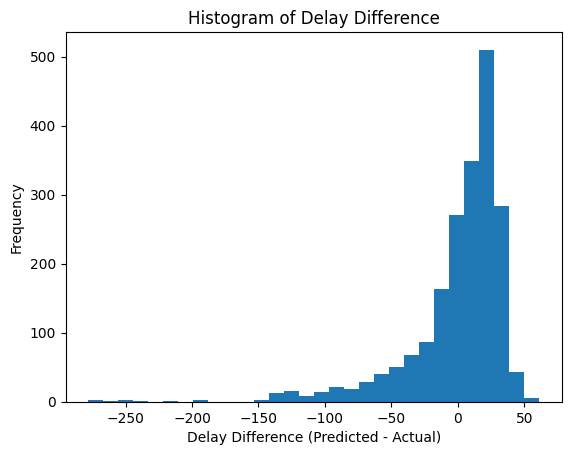

In [157]:
# Calculating the difference between predicted and actual delays.
delay_diff = y_pred - y_test

# Plotting a histogram of the delay difference
plt.hist(delay_diff, bins=30)
plt.xlabel("Delay Difference (Predicted - Actual)")
plt.ylabel("Frequency")
plt.title("Histogram of Delay Difference")
plt.show()

### **Creating a new feature: is_weekend**

In [158]:
#Creating a new feature: is_weekend
df_encoded['is_weekend'] = df_encoded['day'].apply(lambda day: day % 7 == 0 or day % 7 == 6)

In [159]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_FV,airline_WY,...,aircraft_type_Boeing 787,aircraft_type_Embraer E175,origin_CBT,origin_KXL,origin_PHP,origin_SZB,origin_WMW,origin_ZME,origin_ZNE,is_weekend
40337,18,1,10.566427,13.566427,134,2017,0,16.839610,1,0,...,0,0,0,0,0,0,0,1,0,False
9354,20,0,8.775956,11.775956,258,2011,0,32.898689,1,0,...,0,0,0,1,0,0,0,0,0,True
64321,11,1,17.570400,20.570400,273,2021,0,44.002859,1,0,...,0,0,1,0,0,0,0,0,0,True
24993,26,1,5.894353,8.894353,206,2014,0,-7.039840,1,0,...,0,0,0,0,0,0,0,1,0,False
10688,8,1,16.407612,20.407612,347,2011,0,-3.453286,1,0,...,0,0,1,0,0,0,0,0,0,False


In [160]:
# Transforming 'False' and 'True' values into 0 and 1
df_encoded['is_weekend'] = df_encoded['is_weekend'].map({False: 0, True: 1})

In [161]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_FV,airline_WY,...,aircraft_type_Boeing 787,aircraft_type_Embraer E175,origin_CBT,origin_KXL,origin_PHP,origin_SZB,origin_WMW,origin_ZME,origin_ZNE,is_weekend
40337,18,1,10.566427,13.566427,134,2017,0,16.839610,1,0,...,0,0,0,0,0,0,0,1,0,0
9354,20,0,8.775956,11.775956,258,2011,0,32.898689,1,0,...,0,0,0,1,0,0,0,0,0,1
64321,11,1,17.570400,20.570400,273,2021,0,44.002859,1,0,...,0,0,1,0,0,0,0,0,0,1
24993,26,1,5.894353,8.894353,206,2014,0,-7.039840,1,0,...,0,0,0,0,0,0,0,1,0,0
10688,8,1,16.407612,20.407612,347,2011,0,-3.453286,1,0,...,0,0,1,0,0,0,0,0,0,0


In [162]:
X = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'delay'], axis=1)
y = df_encoded['delay']

In [163]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [164]:
# Training the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 1299.9619321833677
Root Mean Squared Error: 36.054984845141284
Mean Absolute Error: 24.36655046308237
R-squared: 0.2582585304366741


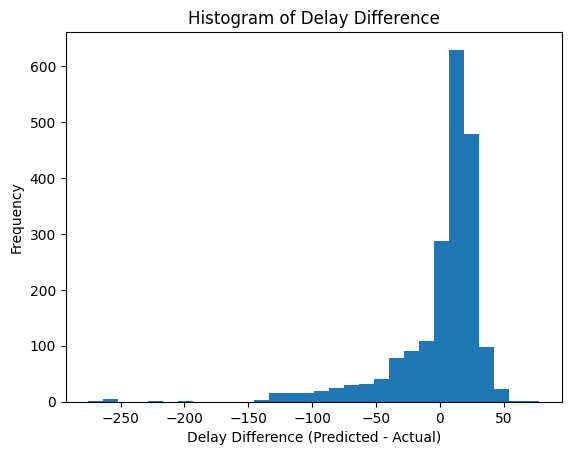

In [165]:
# Calculating the difference between predicted and actual delays
delay_diff = y_pred - y_test

# Plotting a histogram of the delay difference
plt.hist(delay_diff, bins=30)
plt.xlabel("Delay Difference (Predicted - Actual)")
plt.ylabel("Frequency")
plt.title("Histogram of Delay Difference")
plt.show()

In [166]:
import plotly.express as px

In [167]:
px.scatter(x = y_test, y = y_pred, trendline = 'ols', trendline_color_override = 'red',opacity = 0.2)

In [168]:
px.scatter(x = y_pred, y = (y_pred - y_test), trendline = 'ols', trendline_color_override = 'red',opacity = 0.2)

## **4 - Cross-validation**

In [169]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Defining the evaluation metrics
scoring = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'r2': make_scorer(r2_score)
}

# Performing cross-validation and calculating the metrics
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

# Extracting the evaluation metrics
mse_scores = cv_results['test_mse']
rmse_scores = cv_results['test_rmse']
mae_scores = cv_results['test_mae']
r2_scores = cv_results['test_r2']

# Calculating the standard deviation of the metrics
mse_std = np.std(mse_scores)
rmse_std = np.std(rmse_scores)
mae_std = np.std(mae_scores)
r2_std = np.std(r2_scores)

# Printing the evaluation metrics and standard deviation
print(f"MSE Scores: {mse_scores}")
print(f"RMSE Scores: {rmse_scores}")
print(f"MAE Scores: {mae_scores}")
print(f"R2 Scores: {r2_scores}")
print('----------------------------------------------------------------')
print(f"MSE Mean: {mse_scores.mean()}, MSE Std: {mse_std}")
print(f"RMSE Mean: {rmse_scores.mean()}, RMSE Std: {rmse_std}")
print(f"MAE Mean: {mae_scores.mean()}, MAE Std: {mae_std}")
print(f"R2 Mean: {r2_scores.mean()}, R2 Std: {r2_std}")

MSE Scores: [1341.07600484 1415.48483804 1154.51460369 1329.25407392 1407.09323967]
RMSE Scores: [36.62070459 37.62292968 33.97814891 36.45893682 37.51124151]
MAE Scores: [24.35811414 24.74405503 22.86876605 24.88651178 24.58168711]
R2 Scores: [0.25416212 0.30221138 0.28820016 0.29330673 0.24951977]
----------------------------------------------------------------
MSE Mean: 1329.4845520317642, MSE Std: 93.9872920270744
RMSE Mean: 36.438392304139946, RMSE Std: 1.3145791422957365
MAE Mean: 24.287826821192276, MAE Std: 0.7309713397218524
R2 Mean: 0.27748003424154916, R2 Std: 0.02145947818546369


### **Feature importance**

In [170]:
# Getting the feature importances
feature_importance = model.feature_importances_

# Creating a DataFrame to visualize the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Displaying the feature importances
feature_importance_df

,Feature,Importance
3,airline_FV,0.453187
17,is_weekend,0.198008
9,aircraft_type_Embraer E175,0.116222
2,is_holiday,0.089309
1,arrival_time,0.041110
5,airline_YB,0.022041
14,origin_WMW,0.015432
4,airline_WY,0.013256
10,origin_CBT,0.012305
7,aircraft_type_Boeing 737,0.007256


## **5 - Hyperparameters**

In [171]:
# Print the model parameters
params = model.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [172]:
from sklearn.model_selection import GridSearchCV

def grid_search_cv(parameters, model, X_train, y_train):

  # Defining the model and which parameters will be tuned
  model_grid = GridSearchCV(model, param_grid=parameters, cv=5, scoring='neg_mean_absolute_error')

  # Training
  model_grid.fit(X_train, y_train)

  # Obtaining the best values for each parameter
  best_params = model_grid.best_params_

  return best_params

In [173]:
# Defining the hyperparameters to be optimized
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,3]
}

modelo_rf = RandomForestRegressor(random_state=SEED)

In [174]:
# comentei pq ela demora muito, mas é só descomentar para rodar
# grid_search_cv(param_grid, modelo_rf, X_train, y_train)

In [175]:
# Training the model
model = RandomForestRegressor(random_state=SEED, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 1294.4262715333355
Root Mean Squared Error: 35.978136020829865
Mean Absolute Error: 24.30733725197317
R-squared: 0.26141710682564756


**Before optimization:**

- Mean Squared Error: 69.07698110323099
- Root Mean Squared Error: 8.311256289107622
- Mean Absolute Error: 6.04707479745361
- R-squared: 0.8693386014068234

### **Gradient Boosting Regressor**

In [176]:
from sklearn.ensemble import GradientBoostingRegressor

In [177]:
# Training the model
model_boosting = GradientBoostingRegressor()
model_boosting.fit(X_train, y_train)

# Making predictions
y_pred = model_boosting.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 1284.5137739513445
Root Mean Squared Error: 35.84011403373801
Mean Absolute Error: 24.215013986239402
R-squared: 0.26707304977403823


In [178]:
# Defining the hyperparameters to test
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}
modelo_boosting = GradientBoostingRegressor(random_state=SEED)

In [179]:
# grid_search_cv(parameters, modelo_boosting, X_train, y_train)

In [180]:
# Training the model
model_boosting = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=200)
model_boosting.fit(X_train, y_train)

# Making predictions
y_pred = model_boosting.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 1289.8967168035767
Root Mean Squared Error: 35.915132142365515
Mean Absolute Error: 24.252998863273692
R-squared: 0.26400161218579743
